In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Dataset.csv')

In [3]:
df = dataset.copy()
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [5]:
#drop these two features because they are IDs and aren't helpful
df = df.drop(['Ware_house_ID','WH_Manager_ID'],axis=1)

In [6]:
df.describe().T.style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,25000.00,4.09,2.61,0.00,2.00,4.00,6.00,8.00
transport_issue_l1y,25000.00,0.77,1.20,0.00,0.00,0.00,1.00,5.00
Competitor_in_mkt,25000.00,3.10,1.14,0.00,2.00,3.00,4.00,12.00
retail_shop_num,25000.00,4985.71,1052.83,1821.00,4313.00,4859.00,5500.00,11008.00
distributor_num,25000.00,42.42,16.06,15.00,29.00,42.00,56.00,70.00
flood_impacted,25000.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
flood_proof,25000.00,0.05,0.23,0.00,0.00,0.00,0.00,1.00
electric_supply,25000.00,0.66,0.47,0.00,0.00,1.00,1.00,1.00
dist_from_hub,25000.00,163.54,62.72,55.00,109.00,164.00,218.00,271.00
workers_num,24010.00,28.94,7.87,10.00,24.00,28.00,33.00,98.00


In [7]:
df.describe(include='O')

,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
count,25000,25000,25000,25000,25000,24092
unique,2,3,4,6,2,5
top,Rural,Large,North,Zone 6,Company Owned,C
freq,22957,10169,10278,8339,13578,5501


In [8]:
(df.isnull().sum() / df.shape[0]*100).reset_index().rename(columns={0:"missing_values(%)"})

,index,missing_values(%)
0,Location_type,0.000
1,WH_capacity_size,0.000
2,zone,0.000
3,WH_regional_zone,0.000
4,num_refill_req_l3m,0.000
5,transport_issue_l1y,0.000
6,Competitor_in_mkt,0.000
7,retail_shop_num,0.000
8,wh_owner_type,0.000
9,distributor_num,0.000


### Feature "wh_est_year" has 48% missing data

In [9]:
from scipy.stats import pearsonr

# Assuming df is your DataFrame
numerical_column = 'wh_est_year'
target_column = 'product_wg_ton'

# Handle missing and infinite values
df_cleaned = df[['wh_est_year', 'product_wg_ton']].dropna()

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(df_cleaned['wh_est_year'], df_cleaned['product_wg_ton'])

# Print the results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Check significance
if p_value < 0.05:
    print(f"The column \033[1mwh_est_year\033[0m is significantly correlated with the target column \033[1mproduct_wg_ton\033[0m.")
else:
    print(f"There is no significant correlation between wh_est_year and product_wg_ton.")


Pearson Correlation Coefficient: -0.8291182604831985
P-value: 0.0
The column wh_est_year is significantly correlated with the target column product_wg_ton.


## Data Cleaning

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [12]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

df['wh_est_year'] = imputer.fit_transform(df[['wh_est_year']])
df['wh_est_year'] = df['wh_est_year'].round().astype(int)

In [13]:
df['wh_est_year'].isnull().sum()

0

In [14]:
df['wh_est_year'].describe()

count    25000.000000
mean      2009.201080
std          5.456731
min       1996.000000
25%       2009.000000
50%       2009.000000
75%       2010.000000
max       2023.000000
Name: wh_est_year, dtype: float64

### "workers_num" and "approved_wh_govt_certificate" has approx 4% missing data.

In [15]:
df['workers_num'] = imputer.fit_transform(df[['workers_num']])
df['workers_num'] = df['workers_num'].round().astype(int)

In [16]:
df['workers_num'].describe() 

count    25000.000000
mean        28.946600
std          7.715085
min         10.000000
25%         24.000000
50%         28.000000
75%         33.000000
max         98.000000
Name: workers_num, dtype: float64

In [17]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [18]:
df['approved_wh_govt_certificate'].describe() 

count     25000
unique        5
top           C
freq       6409
Name: approved_wh_govt_certificate, dtype: object

## Feature Engineering

In [19]:
from datetime import datetime

current_year = datetime.now().year

In [20]:
df['wh_age']=current_year-df['wh_est_year']
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,wh_age
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,91,29,2009,13,0,A,5,15,17115,14
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,210,31,2009,4,0,A,3,17,5074,14
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,161,37,2009,17,0,A,6,22,23137,14
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,103,21,2009,17,1,A+,3,27,22115,14
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,112,25,2009,18,0,C,6,24,24071,14


<AxesSubplot:ylabel='Frequency'>

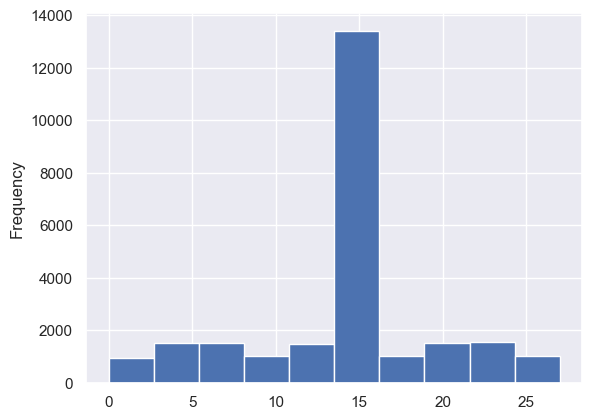

In [21]:
df['wh_age'].plot(kind='hist')

In [22]:
df['wh_age'].describe()

count    25000.000000
mean        13.798920
std          5.456731
min          0.000000
25%         13.000000
50%         14.000000
75%         14.000000
max         27.000000
Name: wh_age, dtype: float64

In [23]:
df['WH_regional_zone'] = df['WH_regional_zone'].str.split(" ").str.get(1).astype('int')
df['WH_regional_zone'].value_counts()

6    8339
5    4587
4    4176
2    2963
3    2881
1    2054
Name: WH_regional_zone, dtype: int64

## Exploratory Data Analysis

Rural    22957
Urban     2043
Name: Location_type, dtype: int64


<AxesSubplot:ylabel='Location_type'>

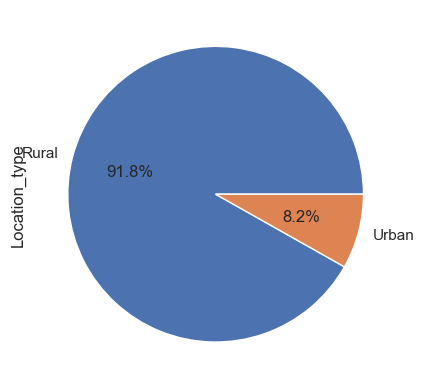

In [24]:
print(df['Location_type'].value_counts())
df['Location_type'].value_counts().plot(kind='pie', autopct='%0.1f%%')

- 91.8% warehouses are located in Rural areas.
- 8.2% warehouses are located in Urban areas.

Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64


<AxesSubplot:ylabel='WH_capacity_size'>

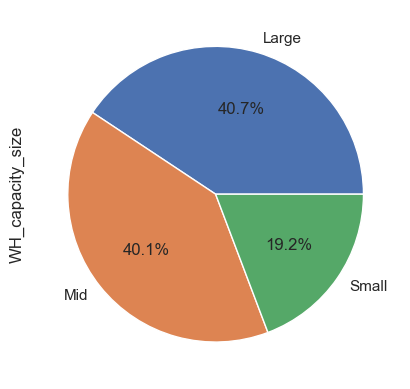

In [25]:
print(df['WH_capacity_size'].value_counts())
df['WH_capacity_size'].value_counts().plot(kind='pie', autopct='%0.1f%%')

- There are approx 40% Large warehouses and 40% Mid warehouses
- only 20% warehouses are small in size
- The difference in capacity is nearly negligible.

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64


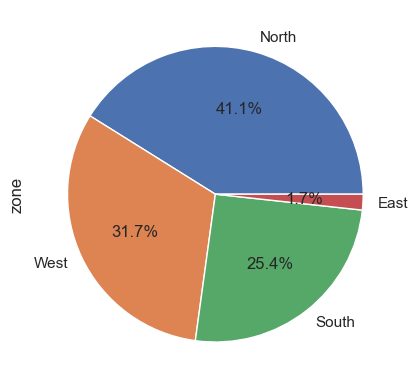

In [26]:
print(df['zone'].value_counts())
df['zone'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.show()

- North zone has highest number of warehouses approx 41%
- East has lowest number of warehouses, only 1.7%
- West has 31.7% and South has 25.4% warehouses.

6    8339
5    4587
4    4176
2    2963
3    2881
1    2054
Name: WH_regional_zone, dtype: int64


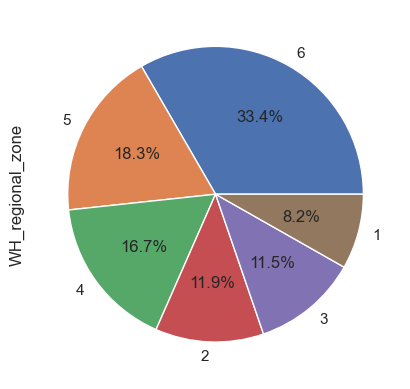

In [27]:
print(df['WH_regional_zone'].value_counts())
df['WH_regional_zone'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.show()

3    2990
8    2970
5    2941
0    2912
7    2873
1    2856
4    2846
6    2804
2    1808
Name: num_refill_req_l3m, dtype: int64


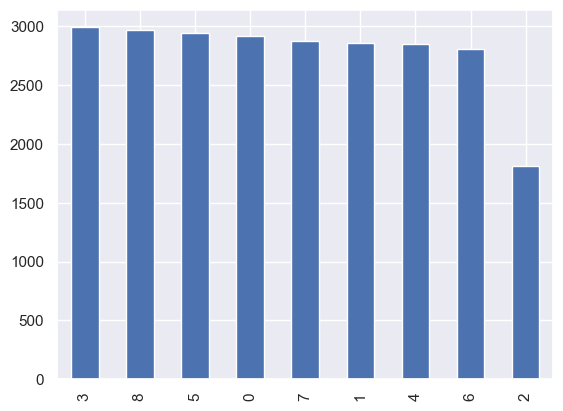

In [28]:
print(df['num_refill_req_l3m'].value_counts())
df['num_refill_req_l3m'].value_counts().plot(kind='bar')
plt.show()

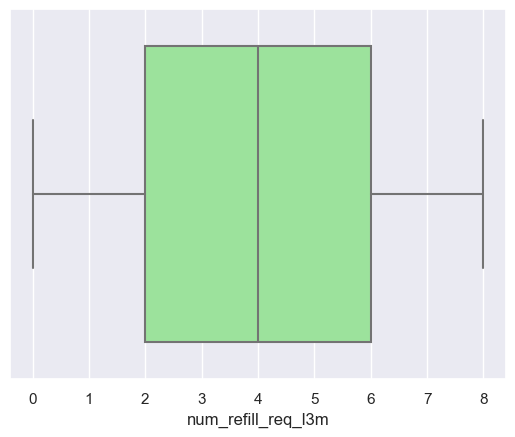

In [29]:
sns.boxplot(x=df['num_refill_req_l3m'], color='lightgreen')
plt.show()

### Observations
- 2846 warehouses needed 4 refills, aligning with the average refill count.
- A total of 2990 warehouses requested only 3 refills in the last 3 months.
- In 2970 warehouses, the maximum number of refills (8) has been carried out, which is the highest recorded.
- The majority of warehouses require refills that exceed the calculated average.
- 2941 warehouses required 5 refills, suggesting a demand level between the extremes of 3 and 8.
- Refills have not been conducted in 2912 warehouses.
- A notable number of 2873 warehouses conducted 7 refills, showcasing a demand pattern close to the maximum.
- 2856 warehouses had only 1 refill, which could indicate a lower demand compared to the average.
- 1808 warehouses were recorded with 2 refills, which is relatively lower compared to the average.

0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: transport_issue_l1y, dtype: int64


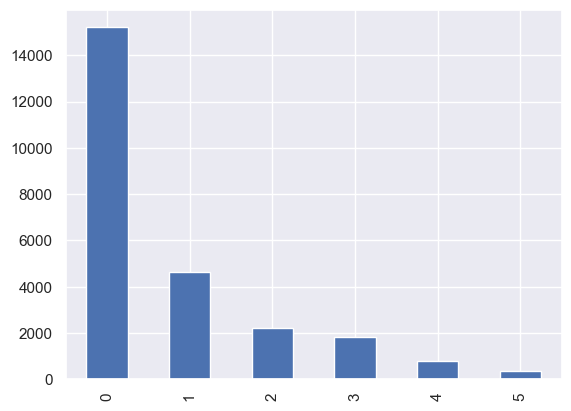

In [30]:
print(df['transport_issue_l1y'].value_counts())
df['transport_issue_l1y'].value_counts().plot(kind='bar')
plt.show()

### Observations
- The majority of warehouses (15,215) did not report any transport issues in the last 3 months.
- A significant number of warehouses (4,644) reported experiencing 1 transport issue during this period.
- 2,198 warehouses reported 2 transport issues, indicating a relatively lower occurrence compared to those with only 1 issue.
- In 1,818 warehouses, 3 transport issues were reported, showing a moderate level of transportation challenges.
- 777 warehouses faced 4 transport issues, suggesting an increase in logistical difficulties for these establishments.
- A total of 348 warehouses encountered 5 transport issues in the last 3 months, reflecting a notable transportation disruption.

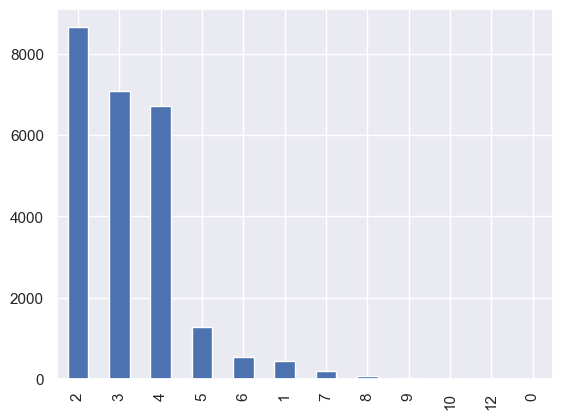

In [31]:
df['Competitor_in_mkt'].value_counts().plot(kind='bar')
plt.show()

### Observations
- The majority of warehouses (8,669) reported having 2 competitors in the market.
- 7,094 warehouses indicated the presence of 3 competitors, reflecting a common competitive scenario.
- 6,708 warehouses reported facing competition from 4 other market players.
- A smaller portion of warehouses (1,265) mentioned dealing with 5 competitors, indicating a more challenging market environment.
- 546 warehouses reported having 6 competitors, suggesting increased market saturation.
- 432 warehouses mentioned having only 1 competitor, indicating a less competitive market scenario.
- 189 warehouses faced competition from 7 other market players, highlighting a more intense competitive landscape.
- A relatively small number of warehouses reported competing with 8 (76 warehouses), 9 (13 warehouses), and 10 (6 warehouses) competitors.
- Only 1 warehouse each reported having 0 and 12 competitors, which could be unique situations within the dataset.

Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64


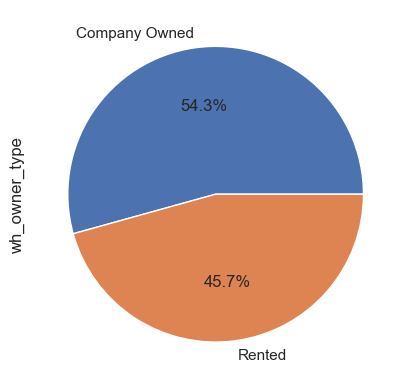

In [32]:
print(df['wh_owner_type'].value_counts())
df['wh_owner_type'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.show()

C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64


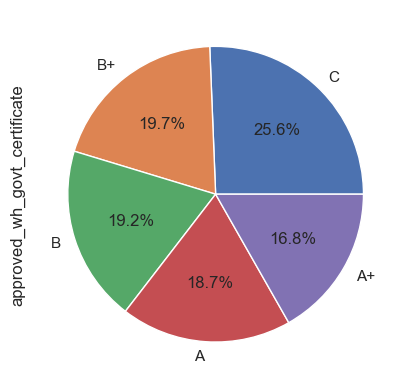

In [33]:
print(df['approved_wh_govt_certificate'].value_counts())
df['approved_wh_govt_certificate'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.show()

<AxesSubplot:xlabel='distributor_num', ylabel='Count'>

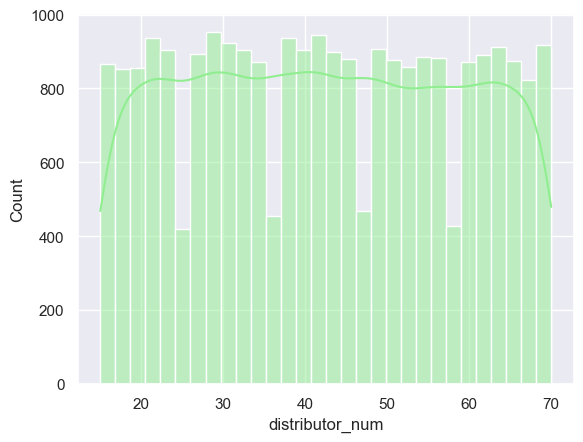

In [34]:
sns.histplot(df['distributor_num'], kde=True, bins=30, color='lightgreen')

count    25000.000000
mean        42.418120
std         16.064329
min         15.000000
25%         29.000000
50%         42.000000
75%         56.000000
max         70.000000
Name: distributor_num, dtype: float64


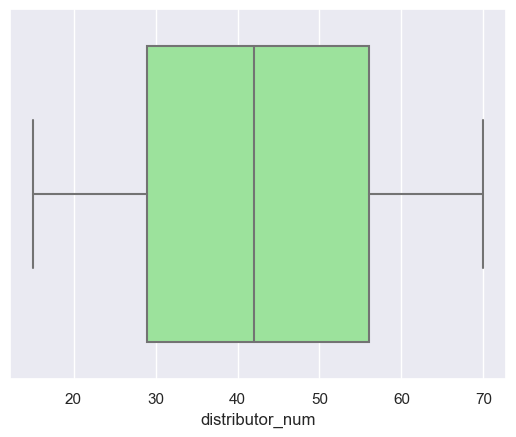

In [35]:
print(df['distributor_num'].describe())
sns.boxplot(x=df['distributor_num'], color='lightgreen')
plt.show()

### Observations
The 'distributor_num' column in the dataset provides information on the number of distributors associated with each warehouse.
- The summary statistics reveal that the dataset contains 25,000 observations, with a mean of approximately 42 distributors per warehouse.
- The standard deviation is around 16, indicating some variability in the number of distributors across warehouses.
- The minimum and maximum values are 15 and 70, respectively, with a median (50th percentile) value of 42.
- The interquartile range (IQR), represented by the 25th and 75th percentiles, spans from 29 to 56 distributors.
- The distribution of the number of distributors is relatively symmetrical, with a slight tendency towards higher counts.
- Warehouses with 31, 41, and 69 distributors have the highest counts, each occurring 481 times.

0    22546
1     2454
Name: flood_impacted, dtype: int64


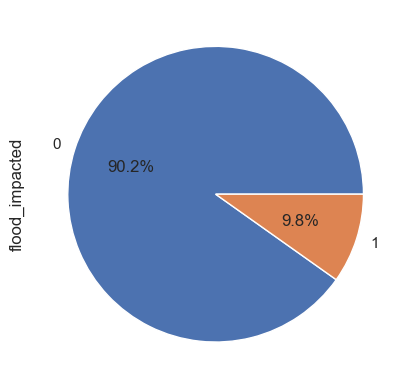

In [36]:
print(df['flood_impacted'].value_counts())
df['flood_impacted'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.show()

### Observations
The 'flood_impacted' column is an indicator representing whether a warehouse is located in a flood-impacted area (1) or not (0).
- The dataset contains 25,000 observations, and the count for warehouses not in flood-impacted areas (0) is 22,546.
- The count for warehouses located in flood-impacted areas (1) is 2,454.
- This indicates that the majority of warehouses in the dataset, approximately 90.18%, are not situated in flood-impacted areas.
- Conversely, about 9.82% of the warehouses are located in flood-impacted areas.

0    23634
1     1366
Name: flood_proof, dtype: int64


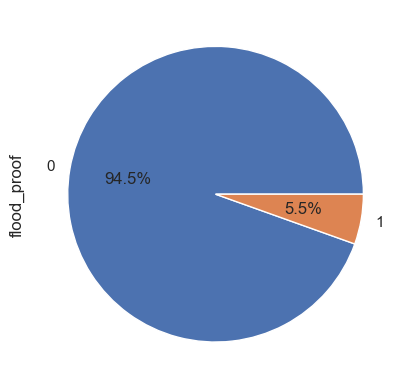

In [37]:
print(df['flood_proof'].value_counts())
df['flood_proof'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.show()

### Observations
The 'flood_proof' column is an indicator representing whether a warehouse is flood-proof (1) or not (0).
- The dataset contains 25,000 observations, and the count for warehouses not labeled as flood-proof (0) is 23,634.
- The count for warehouses labeled as flood-proof (1) is 1,366.
- This indicates that the majority of warehouses in the dataset, approximately 94.54%, are not labeled as flood-proof.
- Conversely, about 5.46% of the warehouses are labeled as flood-proof.

<AxesSubplot:xlabel='dist_from_hub', ylabel='Count'>

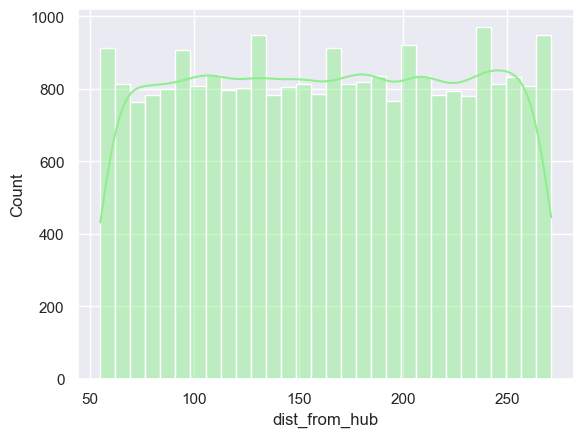

In [38]:
sns.histplot(df['dist_from_hub'], kde=True, bins=30, color='lightgreen')

count    25000.000000
mean       163.537320
std         62.718609
min         55.000000
25%        109.000000
50%        164.000000
75%        218.000000
max        271.000000
Name: dist_from_hub, dtype: float64


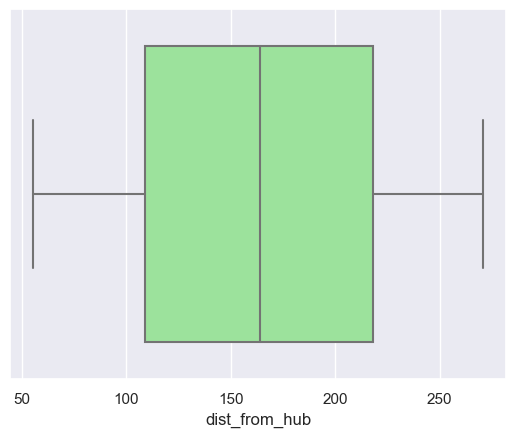

In [39]:
print(df['dist_from_hub'].describe())
sns.boxplot(x=df['dist_from_hub'], color='lightgreen')
plt.show()

### Observations
The 'dist_from_hub' column provides information on the distance of each warehouse from the hub.
- The mean distance from the hub is approximately 163.54, indicating a central tendency around this value.
- The standard deviation of 62.72 suggests a moderate amount of variability in warehouse distances.
- The minimum and maximum distances are 55 and 271, respectively, showcasing a range from shorter to longer distances.
- The median distance (50th percentile) is 164, indicating that half of the warehouses have distances below this value and half above.
- The interquartile range (IQR), represented by the 25th and 75th percentiles, spans from 109 to 218, indicating the middle 50% of the data.
- The distribution of distances appears to be approximately symmetrical around the mean.

<AxesSubplot:xlabel='workers_num', ylabel='Count'>

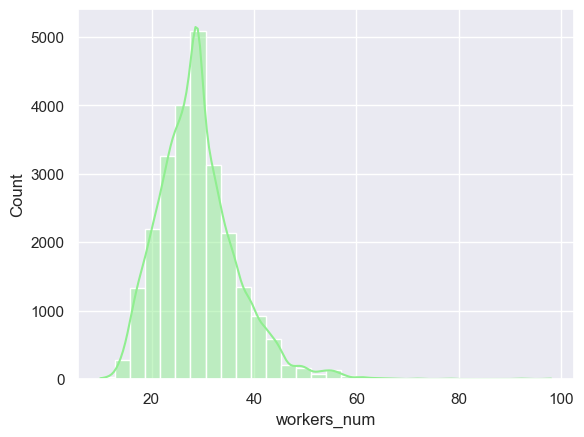

In [40]:
sns.histplot(df['workers_num'], kde=True, bins=30, color='lightgreen')

count    25000.000000
mean        28.946600
std          7.715085
min         10.000000
25%         24.000000
50%         28.000000
75%         33.000000
max         98.000000
Name: workers_num, dtype: float64


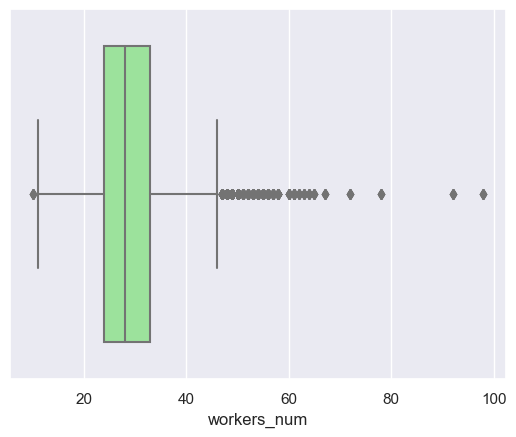

In [41]:
print(df['workers_num'].describe())
sns.boxplot(x=df['workers_num'], color='lightgreen')
plt.show()

### Observations
The 'workers_num' column provides information on the number of workers in each warehouse,  the dataset reflects a diverse range of workforce sizes in warehouses.
- The mean number of workers is approximately 28.95, indicating a central tendency around this value.
- The standard deviation of 7.72 suggests a moderate amount of variability in the number of workers across warehouses.
- The minimum and maximum numbers of workers are 10 and 98, respectively, showcasing a range from a minimum to a relatively high number of workers.
- The median number of workers (50th percentile) is 28, indicating that half of the warehouses have a number of workers below this value and half above.
- The interquartile range (IQR), represented by the 25th and 75th percentiles, spans from 24 to 33, indicating the middle 50% of the data.
- The distribution of the number of workers appears to be approximately symmetrical around the mean.

<AxesSubplot:xlabel='wh_est_year', ylabel='Count'>

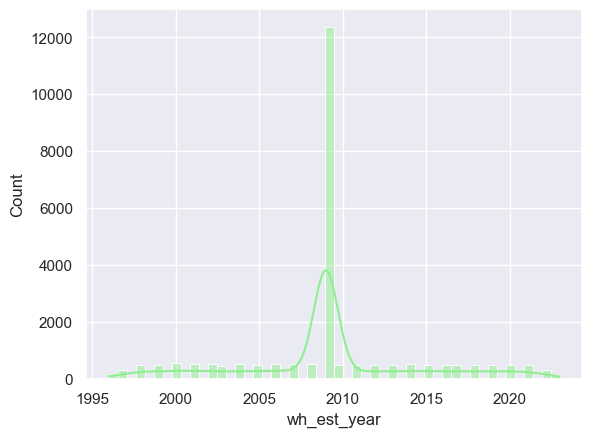

In [42]:
sns.histplot(df['wh_est_year'], kde=True, bins=50, color='lightgreen')

count    25000.000000
mean      2009.201080
std          5.456731
min       1996.000000
25%       2009.000000
50%       2009.000000
75%       2010.000000
max       2023.000000
Name: wh_est_year, dtype: float64


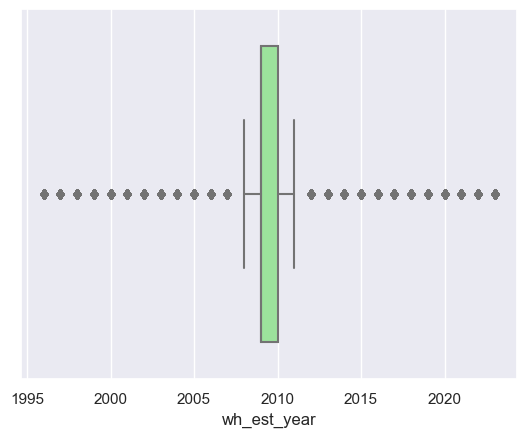

In [43]:
print(df['wh_est_year'].describe())
sns.boxplot(x=df['wh_est_year'], color='lightgreen')
plt.show()

### Observations
The 'wh_est_year' column provides information on the year each warehouse was established.
- The minimum and maximum establishment years are 1996 and 2023, respectively, showcasing a range from the mid-'90s to the present.
- The median establishment year (50th percentile) is also 2009, indicating that half of the warehouses were established in or before this year and half after.
- The interquartile range (IQR), represented by the 25th and 75th percentiles, spans from 2009 to 2010, indicating the middle 50% of the establishment years.

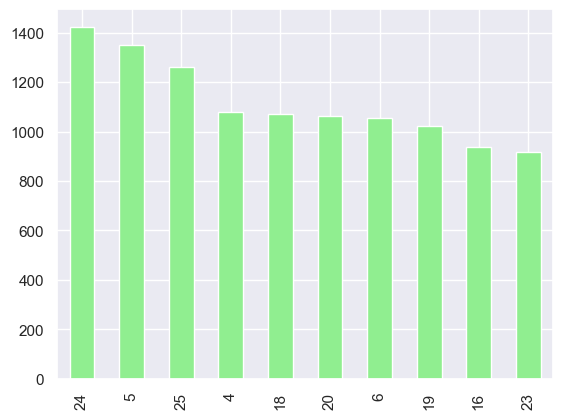

In [44]:
df['storage_issue_reported_l3m'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.show()

### Observations
The 'storage_issue_reported_l3m' column provides information on the number of reported storage issues in the last 3 months.
- The minimum and maximum reported storage issues are 0 and 39, respectively, showcasing a range of potential issues.
- The median (50th percentile) is 18, indicating that half of the warehouses reported 18 or fewer storage issues in the last 3 months.
- The interquartile range (IQR), represented by the 25th and 75th percentiles, spans from 10 to 24, indicating the middle 50% of reported storage issues.

0    17418
1     7582
Name: temp_reg_mach, dtype: int64


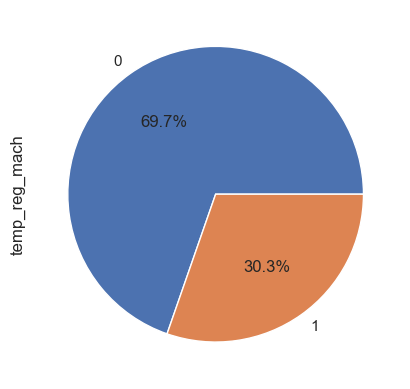

In [45]:
print(df['temp_reg_mach'].value_counts())
df['temp_reg_mach'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.show()

### Observations
The 'temp_reg_mach' column indicates whether warehouses have a temperature-regulating machine.
- 17,418 warehouses (approximately 69.67%) do not have a temperature-regulating machine, while 7,582 warehouses (approximately 30.33%) have one.
- The majority of warehouses in the dataset lack a temperature-regulating machine, indicating that a significant portion may not require controlled temperature environments.
- The presence of 7,582 warehouses with a temperature-regulating machine suggests a substantial number of warehouses equipped to control temperature, which could be crucial for certain types of stored goods.

count    25000.000000
mean        18.812280
std          8.632382
min          1.000000
25%         11.000000
50%         21.000000
75%         26.000000
max         32.000000
Name: govt_check_l3m, dtype: float64



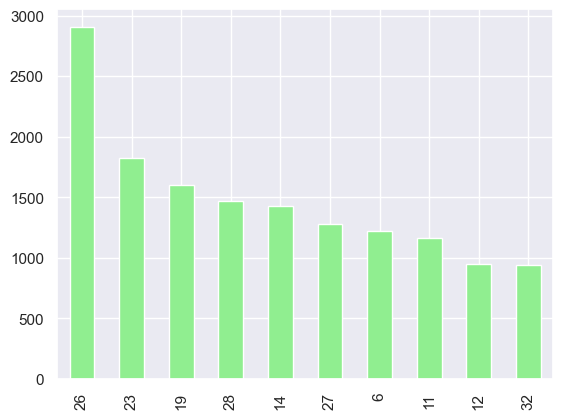

In [46]:
print(df['govt_check_l3m'].describe())
print()
df['govt_check_l3m'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.show()

### Observations
The 'govt_check_l3m' column represents the count of times government officers visited the warehouse to check the quality and expiry of stored food in the last 3 months.
- The minimum recorded value is 1, implying that there are warehouses with a minimal presence of government officers checking the stored food.
- The 25th percentile (Q1) is 11, indicating that 25% of the warehouses have experienced 11 or fewer government checks in the last 3 months.
- The median (50th percentile or Q2) is 21, suggesting that half of the warehouses have had 21 or fewer government checks.
- The 75th percentile (Q3) is 26, implying that 75% of the warehouses have undergone 26 or fewer government checks.
- The maximum recorded value is 32, indicating that some warehouses have experienced the maximum possible number of government checks within the specified time frame.

wh_owner_type     Company Owned  Rented
wh_breakdown_l3m                       
0                           498     410
1                          1133     903
2                          2804    2272
3                          2740    2266
4                          2156    1881
5                          2074    1851
6                          2173    1839


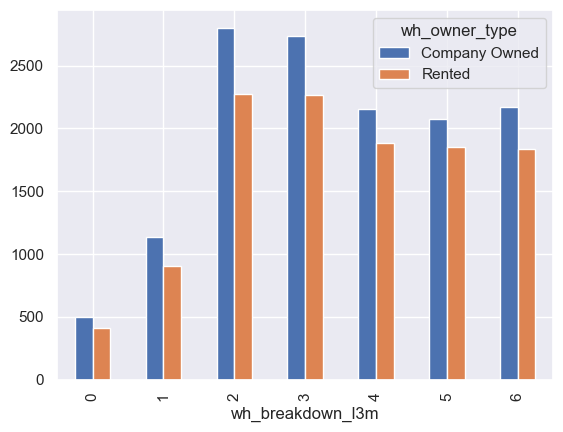

In [47]:
print(pd.crosstab(df['wh_breakdown_l3m'], df['wh_owner_type']))
pd.crosstab(df['wh_breakdown_l3m'], df['wh_owner_type']).plot(kind='bar')
plt.show()

### Observations
- Warehouses that did not experience any breakdown in the last 3 months are relatively evenly distributed between company-owned (498) and rented (410) types.
- As the number of breakdowns increases, the trend leans towards higher counts for both company-owned and rented warehouses.
- The highest counts are observed in the category of 2 breakdowns, with 2804 company-owned and 2272 rented warehouses.
- The distribution remains similar for 3 breakdowns, with 2740 company-owned and 2266 rented warehouses.
- The counts decrease as the number of breakdowns continues to rise, but the overall pattern of company-owned warehouses having slightly higher counts persists.
- This pattern indicates that breakdown occurrences are relatively evenly distributed between company-owned and rented warehouses, with a slight tendency for higher counts in the company-owned category.

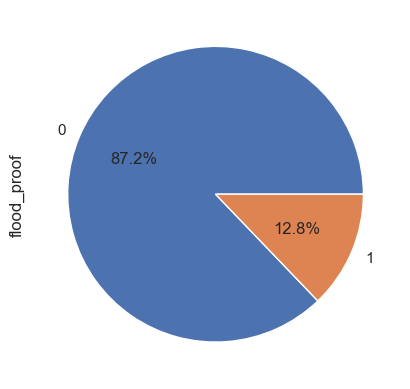

In [48]:
# Select the subset of the DataFrame based on conditions
subset_df = df[(df['flood_impacted'] == 1) & ((df['flood_proof'] == 1) | (df['flood_proof'] == 0))]

subset_df['flood_proof'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.show()

### Observations
- Among the warehouses impacted by floods, there are 87.2% warehouses that have not implemented flood-proof measures.
- On the other hand, there are 12.8% warehouses that have implemented flood-proof measures among the flood-impacted warehouses.
- This suggests that a significant portion of flood-impacted warehouses has not implemented flood-proof measures, indicating potential vulnerabilities in these locations.
- The number of warehouses with flood-proof measures is comparatively lower, emphasizing the need for considering and implementing additional protective measures in flood-prone areas.

In [49]:
df['product_wg_ton'].describe()

count    25000.000000
mean     22102.632920
std      11607.755077
min       2065.000000
25%      13059.000000
50%      22101.000000
75%      30103.000000
max      55151.000000
Name: product_wg_ton, dtype: float64

<AxesSubplot:xlabel='product_wg_ton', ylabel='Count'>

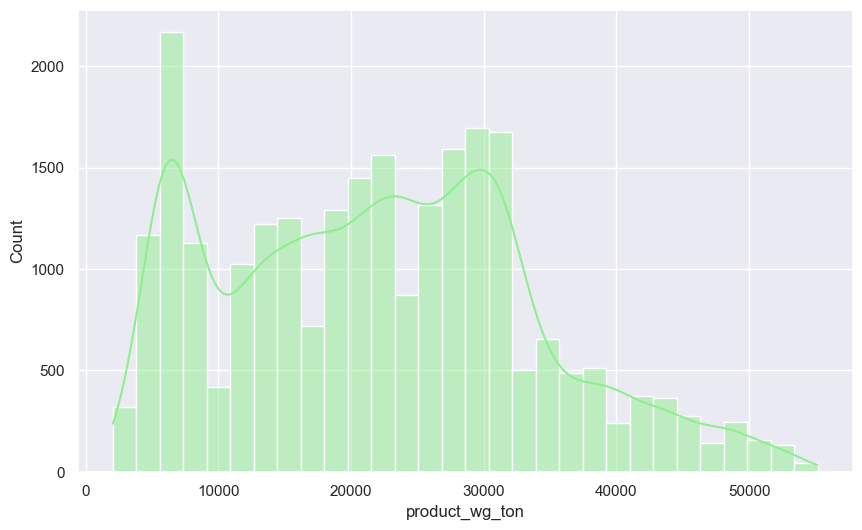

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(df['product_wg_ton'], kde=True, bins=30, color='lightgreen')

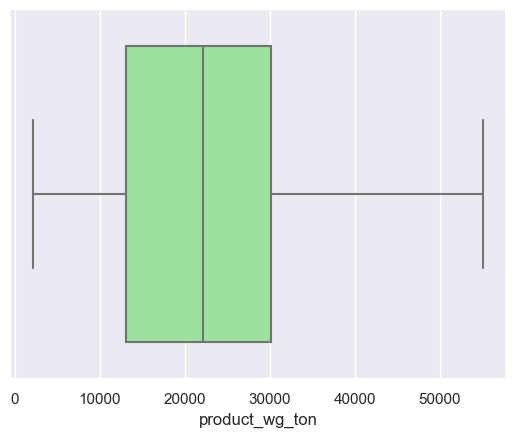

In [51]:
sns.boxplot(x=df['product_wg_ton'], color='lightgreen')
plt.show()

### Observations
- The average product weight in tons for the warehouses over the last three months is approximately 22,102.63 tons.
- The product weight exhibits a wide range, with values ranging from a minimum of 2,065 tons to a maximum of 55,151 tons.
- The 25th percentile (Q1) is at 13,059 tons, indicating that 25% of the warehouses have a product weight of 13,059 tons or lower.
- The median (50th percentile or Q2) is at 22,101 tons, suggesting that 50% of the warehouses have a product weight of 22,101 tons or lower.
- The 75th percentile (Q3) is at 30,103 tons, showing that 75% of the warehouses have a product weight of 30,103 tons or lower.
- The mean and median are close in value, indicating a relatively symmetrical distribution of product weight.
- The standard deviation of 11,607.76 points to a moderate amount of variability in the product weight among the warehouses.
- The maximum product weight recorded in the last three months is 55,151 tons, representing the highest weight among the warehouses during this period.

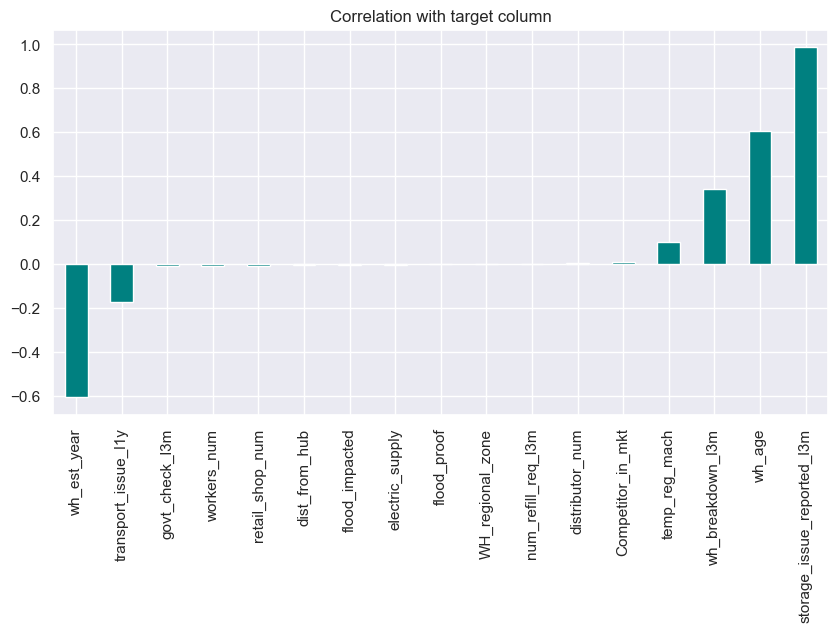

In [52]:
plt.figure(figsize=(10,5),dpi=100)
df.corr()['product_wg_ton'].sort_values(ascending=True)[:-1].plot(kind='bar',color='teal')
plt.title('Correlation with target column');

In [53]:
df.corr()['product_wg_ton'].sort_values(ascending=True)[:-1]

wh_est_year                  -0.604957
transport_issue_l1y          -0.173992
govt_check_l3m               -0.008500
workers_num                  -0.008190
retail_shop_num              -0.006615
dist_from_hub                -0.005017
flood_impacted               -0.002299
electric_supply              -0.002160
flood_proof                  -0.000441
WH_regional_zone              0.000563
num_refill_req_l3m            0.001415
distributor_num               0.004999
Competitor_in_mkt             0.008884
temp_reg_mach                 0.101638
wh_breakdown_l3m              0.342685
wh_age                        0.604957
storage_issue_reported_l3m    0.986777
Name: product_wg_ton, dtype: float64

### Observations
#### Negative Correlation:
Warehouse establishment year (wh_est_year) has a moderately negative correlation (-0.60) with the target column (product_wg_ton). This indicates that older warehouses tend to have lower product weight.
#### Weak Negative Correlation:
Transport issues in the last year (transport_issue_l1y) have a weak negative correlation (-0.17) with the target. This suggests a slight tendency for warehouses with fewer transport issues to have a higher product weight.
#### No Significant Correlation:
The variables govt_check_l3m, workers_num, retail_shop_num, dist_from_hub, flood_impacted, electric_supply, flood_proof, WH_regional_zone, num_refill_req_l3m, distributor_num, Competitor_in_mkt, and WH_regional_zone have correlations close to zero, indicating a lack of significant linear relationship with the target.
#### Positive Correlation:
Temperature-regulating machine indicator (temp_reg_mach) has a moderate positive correlation (0.10) with the target. This suggests that warehouses with temperature-regulating machines may have a slightly higher product weight.
#### Moderate Positive Correlation:
Warehouse breakdowns in the last 3 months (wh_breakdown_l3m) have a moderate positive correlation (0.34) with the target. This implies that warehouses experiencing breakdowns tend to have a higher product weight.
#### Strong Positive Correlation:
Warehouse age (wh_age) is strongly positively correlated (0.60) with the target. This indicates that older warehouses have a higher product weight.
#### Very Strong Positive Correlation:
Storage issues reported in the last 3 months (storage_issue_reported_l3m) have a very strong positive correlation (0.99) with the target. This suggests that warehouses reporting storage issues tend to have a significantly higher product weight.

In [54]:
from scipy.stats import f_oneway

# Select categorical columns from the DataFrame
categorical_columns = df.select_dtypes(include='object').columns

# Loop through each categorical column
for feature in categorical_columns:
    # Group your data by the levels of the categorical variable (feature)
    grouped_data = [df[df[feature] == level]['product_wg_ton'] for level in df[feature].unique()]

    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(*grouped_data)

    # Print the results
    print(f"ANOVA F-statistic for {feature}: {f_statistic}")
    print(f"P-value for {feature}: {p_value}")

    # Check for statistical significance
    alpha = 0.05  # Set your significance level
    if p_value < alpha:
        print(f"The means for {feature} are significantly different. Reject the null hypothesis.")
    else:
        print(f"Fail to reject the null hypothesis for {feature}. There is no significant difference in means.")
    print("\n")

ANOVA F-statistic for Location_type: 139.7707718232802
P-value for Location_type: 3.639842569002911e-32
The means for Location_type are significantly different. Reject the null hypothesis.


ANOVA F-statistic for WH_capacity_size: 1.1055247086419706
P-value for WH_capacity_size: 0.33105332353276035
Fail to reject the null hypothesis for WH_capacity_size. There is no significant difference in means.


ANOVA F-statistic for zone: 1.105560535427426
P-value for zone: 0.345348882713349
Fail to reject the null hypothesis for zone. There is no significant difference in means.


ANOVA F-statistic for wh_owner_type: 0.8430198692893285
P-value for wh_owner_type: 0.35854337110917667
Fail to reject the null hypothesis for wh_owner_type. There is no significant difference in means.


ANOVA F-statistic for approved_wh_govt_certificate: 365.64403206232333
P-value for approved_wh_govt_certificate: 1.550048556967167e-306
The means for approved_wh_govt_certificate are significantly different. Reject the

### Observations
#### Highly Relevant Features:
  Location Type:
- ANOVA F-statistic: 139.77
- P-value: 3.64e-32
- Observation: Significant differences in means, highly relevant.
Approved Warehouse Govt Certificate:
- ANOVA F-statistic: 365.64
- P-value: 1.55e-306
- Observation: Significant differences in means, highly relevant.
#### Potentially Relevant Feature:
Warehouse Capacity Size:
- ANOVA F-statistic: 1.11
- P-value: 0.33
- Observation: Borderline result (p-value: 0.33), potential relevance, further investigation warranted.
#### Less Relevant Features:
Zone:
- ANOVA F-statistic: 1.11
- P-value: 0.35
- Observation: No significant differences in means, less relevant.
Warehouse Owner Type:
- ANOVA F-statistic: 0.84
- P-value: 0.36
- Observation: No significant differences in means, less relevant.

## Encoding Categorical Features

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Location_type                 25000 non-null  object
 1   WH_capacity_size              25000 non-null  object
 2   zone                          25000 non-null  object
 3   WH_regional_zone              25000 non-null  int32 
 4   num_refill_req_l3m            25000 non-null  int64 
 5   transport_issue_l1y           25000 non-null  int64 
 6   Competitor_in_mkt             25000 non-null  int64 
 7   retail_shop_num               25000 non-null  int64 
 8   wh_owner_type                 25000 non-null  object
 9   distributor_num               25000 non-null  int64 
 10  flood_impacted                25000 non-null  int64 
 11  flood_proof                   25000 non-null  int64 
 12  electric_supply               25000 non-null  int64 
 13  dist_from_hub   

In [56]:
df.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'wh_age'],
      dtype='object')

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Location_type'] = le.fit_transform(df['Location_type'])
df['WH_capacity_size'] = le.fit_transform(df['WH_capacity_size'])
df['wh_owner_type'] = le.fit_transform(df['wh_owner_type'])
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])

df = pd.get_dummies(df, columns=['zone'], prefix='zone', drop_first=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Location_type                 25000 non-null  int32
 1   WH_capacity_size              25000 non-null  int32
 2   WH_regional_zone              25000 non-null  int32
 3   num_refill_req_l3m            25000 non-null  int64
 4   transport_issue_l1y           25000 non-null  int64
 5   Competitor_in_mkt             25000 non-null  int64
 6   retail_shop_num               25000 non-null  int64
 7   wh_owner_type                 25000 non-null  int32
 8   distributor_num               25000 non-null  int64
 9   flood_impacted                25000 non-null  int64
 10  flood_proof                   25000 non-null  int64
 11  electric_supply               25000 non-null  int64
 12  dist_from_hub                 25000 non-null  int64
 13  workers_num                   2

<AxesSubplot:>

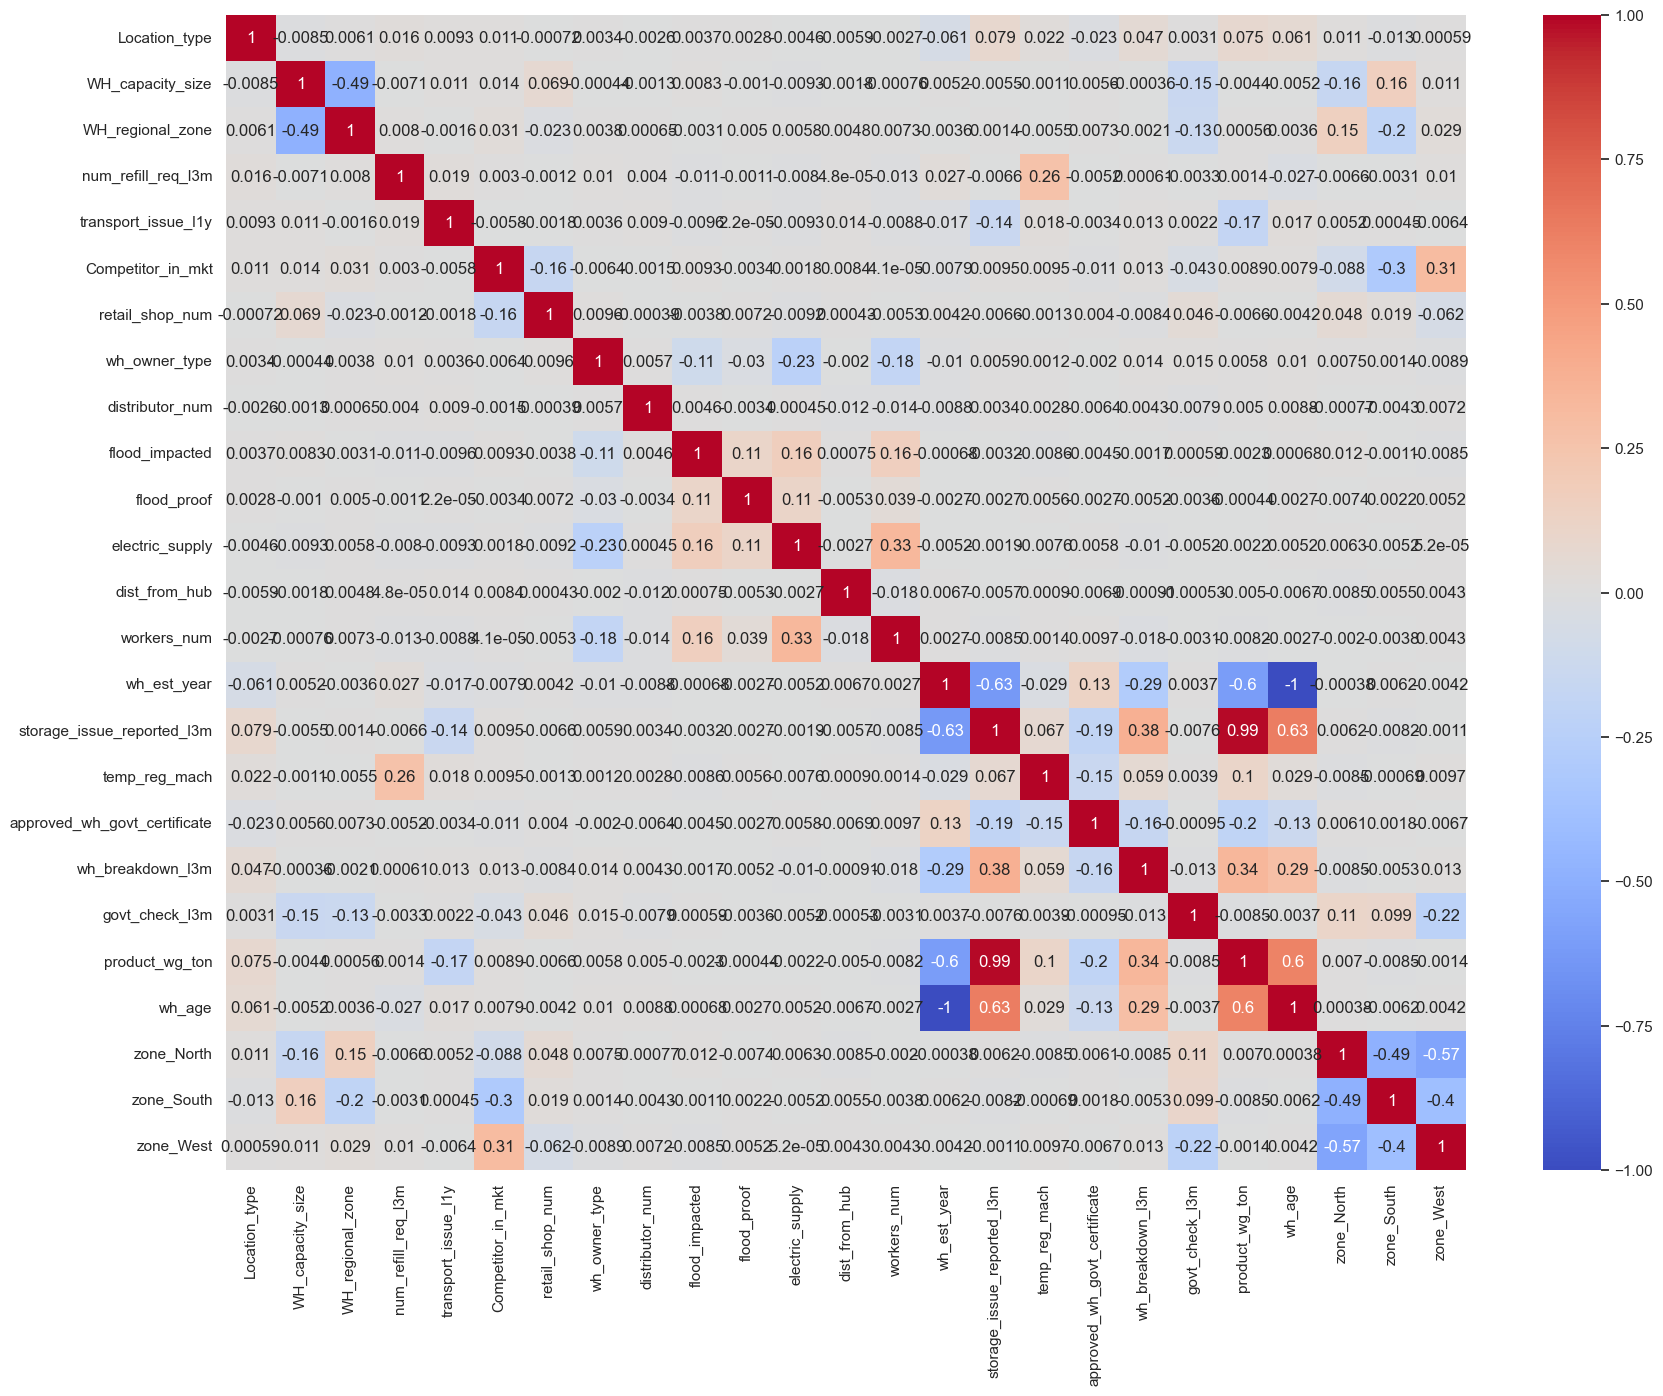

In [59]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [60]:
df.drop(['wh_est_year', 'zone_North'], axis=1, inplace=True)

### Splitting Independent and Dependent variables.

In [61]:
x = df.drop(['product_wg_ton'], axis=1)
y = df['product_wg_ton']

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_sc = sc.fit_transform(x)

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_sc
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.007956,Location_type
1,1.419529,WH_capacity_size
2,1.410836,WH_regional_zone
3,1.076460,num_refill_req_l3m
4,1.048786,transport_issue_l1y
5,1.188676,Competitor_in_mkt
6,1.037271,retail_shop_num
7,1.074689,wh_owner_type
8,1.000804,distributor_num
9,1.054692,flood_impacted


### Observations
- All Variance Inflation Factors (VIFs) are close to 1, indicating low multicollinearity.
- No evidence of problematic correlations among independent variables.
- Features have VIFs well below the common threshold of 5, suggesting stability in the model.
- Location_type, WH_capacity_size, and WH_regional_zone exhibit VIFs close to 1, indicating minimal correlation with other features.
- Absence of high VIF values ensures that the model is not affected by collinearity issues.
- Features like num_refill_req_l3m, transport_issue_l1y, and retail_shop_num demonstrate VIFs close to 1, indicating independence.
- Key predictors such as electric_supply, dist_from_hub, and distributor_num have VIFs close to 1, suggesting stability in their predictive power.
- Some features, such as storage_issue_reported_l3m, govt_check_l3m, and wh_age, have moderate VIFs (around 1.8), indicating a moderate level of correlation with other features.
- Zone-specific dummy variables (zone_South, zone_West) show VIFs around 1.3, suggesting independence among these categorical features.
- The absence of high VIFs across features indicates the stability of the model and the reliability of the coefficients estimated for each variable.
- The low VIF values indicate that the dataset is suitable for regression analysis, and the features can be considered independently for predicting the target variable.

In [64]:
# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sc, y_transformed, test_size=0.25, random_state=101)

In [66]:
def scorer(model_name, model, x_train, x_test, y_train, y_test):

    output = [model_name]

    # Train the model
    model.fit(x_train, y_train)

    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    output.append(scores.mean())

    # Make predictions
    y_pred = model.predict(x_test)

    # Reverse the transformation
    y_pred = np.expm1(y_pred)
    y_test = np.expm1(y_test)

    # Calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    output.append(mae)

    return output

In [67]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.decomposition import PCA

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [68]:
model_dict = {
    'linear_reg':LinearRegression(),
    'svr':SVR(),
    'ridge':Ridge(),
    'LASSO':Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'mlp': MLPRegressor(),
    'xgboost':XGBRegressor()
}

In [69]:
model_output = []

for model_name, model in model_dict.items():
    model_output.append(scorer(model_name, model, x_train, x_test, y_train, y_test))

In [70]:
model_output

[['linear_reg', 0.9143562250326431, 3154.5087439420663],
 ['svr', 0.9707247929706421, 1433.8430703522167],
 ['ridge', 0.9143562788853965, 3154.1273473888277],
 ['LASSO', -0.0004903273054741141, 9982.523017885707],
 ['decision tree', 0.9781248589052268, 798.83872],
 ['random forest', 0.9886956524956885, 668.6143643833813],
 ['extra trees', 0.988211640350055, 679.40747635779],
 ['gradient boosting', 0.9888981701506931, 671.7058232345166],
 ['adaboost', 0.9664543372551598, 1618.8637539761012],
 ['mlp', 0.9734311568260343, 1313.1119972526967],
 ['xgboost', 0.9882459454823505, 663.9295795703124]]

In [71]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])

In [72]:
model_df.sort_values(['mae'])

,name,r2,mae
10,xgboost,0.988246,663.929580
5,random forest,0.988696,668.614364
7,gradient boosting,0.988898,671.705823
6,extra trees,0.988212,679.407476
4,decision tree,0.978125,798.838720
9,mlp,0.973431,1313.111997
1,svr,0.970725,1433.843070
8,adaboost,0.966454,1618.863754
2,ridge,0.914356,3154.127347
0,linear_reg,0.914356,3154.508744


In [73]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost regressor
xgb_model = XGBRegressor()

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use the appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores
)

# Perform Grid Search
grid_result = grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_result.best_params_)

# Get the best model
best_model = grid_result.best_estimator_

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9}


### Grid Search for XGBoost Hyperparameters:
- Parameter grid explored includes variations in n_estimators, learning_rate, max_depth, min_child_weight, subsample, and colsample_bytree.
- Utilized negative mean squared error (neg_mean_squared_error) as the scoring metric.
- Employed 5-fold cross-validation to robustly evaluate model performance.
- Execution of Grid Search involved exploration of various combinations across the parameter grid.
- The best hyperparameters identified by Grid Search for optimal model performance are:
- - - Learning Rate: 0.1
- - - Max Depth: 4
- - - Min Child Weight: 2
- - - Number of Estimators: 100
- - - Subsample: 0.9
- - - Colsample_bytree: 1.0
- The identified best model incorporates these hyperparameter values, enhancing predictive accuracy.

## Finam model using best hyperparameters

In [74]:
# Initialize the XGBoost Regressor with the best hyperparameters
xgb_model = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=4,
    min_child_weight=2,
    n_estimators=100,
    subsample=0.9
)

# Train the model on the training set
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(x_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("\033[1m\033[3mEvaluation Result\n")
print(f"R-squared score: {r2*100:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Evaluation Result

R-squared score: 98.8699
Mean Absolute Error: 0.0397


### Conclusion
The evaluation of different regressors revealed that the Gradient Boosting Regressor outperformed other models, including the Random Forest. With lower mean squared error and mean absolute error, the Gradient Boosting Regressor exhibited superior predictive accuracy for the target variable. Its R² score, approaching 99%, indicates a strong fit to the dataset. Hence, based on the results obtained, the Gradient Boosting Regressor stands out as the optimal choice, providing the most accurate and precise predictions for this specific dataset.